In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from seis2GR import seis2GR
import pandas as pd
import os

# Applied Seismology (GEOS 626) - University of Alaska Fairbanks
# Python adaptation of the Gutenberg-Richter frequency-magnitude relationship HW by Carl Tape
# Explores the relationship between cumulative and regular distributions using the GCMT catalog as an example.
# See Pacheco, Scholz, Sykes (1992 Nature) for details on the two segments of the GCMT distribution

# Calls seis2GR.py

# Run this cell at the beginning of each session

In [5]:
# download relocated aftershock seismicity from Cetin et al., 2020 found @
# https://geerassociation.org/index.php/component/geer_reports/?view=geerreports&layout=build&id=96
# https://geerassociation.org/component/geer_reports/?view=geerreports&id=96
if not os.path.isfile("data/TableS1_RelocAfter.cat"):
    os.system('wget "https://geerassociation.org/components/com_geer_reports/geerfiles/TableS1.cat" -O "data/TableS1_RelocAfter.cat"')
data = pd.read_csv("data/TableS1_RelocAfter.cat", sep="\s+", skiprows=0,
                          names=["Year", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "NaN"]) # do not skip first shock 

In [6]:
#data = pd.read_csv('/import/freenas-m-05-seissol/kutschera/HIWI/MAthesis/IRIS2022SSBW_FinalProject/data/TableS1_RelocAfter.cat',
#                  sep='\s+',names=["Year", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "NaN"], skiprows=1)
print(data.keys()) # This allows you to see what variables are in your dictionary
data.head()

Index(['Year', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'NaN'], dtype='object')


,Year,Time,Latitude,Longitude,Depth,Magnitude,NaN
0,2020,1.030115e+09,37.8919,26.8066,8.2,6.7,NaN
1,2020,1.030120e+09,37.8830,26.9624,7.9,4.2,NaN
2,2020,1.030121e+09,37.8285,26.8643,4.1,3.9,NaN
3,2020,1.030122e+09,37.7733,26.4855,10.5,4.2,NaN
4,2020,1.030122e+09,37.9052,26.9165,6.9,3.7,NaN


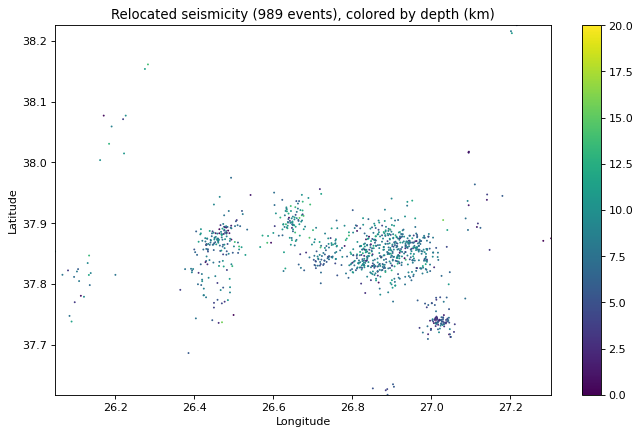

In [7]:
Mw = data['Magnitude']
dep = data['Depth']
lat = data['Latitude']
lon = data['Longitude']

#lon[lon<0] = lon[lon<0] + 360 # center map on 180 deg
title = 'Relocated seismicity (' + str(len(dep)) + ' events), colored by depth (km)'

plt.figure(figsize=(10,6),dpi=80)
plt.scatter(lon,lat,s=0.5,c=dep,cmap='viridis',vmin=0,vmax=20)
plt.xlim(min(lon),max(lon))
plt.ylim(min(lat),max(lat))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(title)
plt.colorbar()
plt.show()

In [8]:
print("Range of depth is from {} km until {} km".format(dep.min(), dep.max()))

print("Range of (moment) magnitudes is from {:.2f} until {:.2f}".format(Mw.min(), Mw.max()))

Range of depth is from 0.1 km until 15.8 km
Range of (moment) magnitudes is from 0.00 until 6.70


In [9]:
# Problem 1-2

dmag = 0.1 # Magnitude bin width

# Note: seis2GR is a homebrewed function. You must have it in your working directory
# Note: Python is 0-indexed, i.e. 'bin 0' is the first bin in the array

N, Ninc, Medges = seis2GR(Mw,0.1)

seis2GR: 989 events, min M = 0.000, max M = 6.700
bin  0 : Mw = [ 0.0   0.1 ] Ninc =  14 N =  989
bin  1 : Mw = [ 0.1   0.2 ] Ninc =  0 N =  975
bin  2 : Mw = [ 0.2   0.3 ] Ninc =  0 N =  975
bin  3 : Mw = [ 0.3   0.4 ] Ninc =  0 N =  975
bin  4 : Mw = [ 0.4   0.5 ] Ninc =  0 N =  975
bin  5 : Mw = [ 0.5   0.6 ] Ninc =  0 N =  975
bin  6 : Mw = [ 0.6   0.7 ] Ninc =  0 N =  975
bin  7 : Mw = [ 0.7   0.8 ] Ninc =  0 N =  975
bin  8 : Mw = [ 0.8   0.9 ] Ninc =  0 N =  975
bin  9 : Mw = [ 0.9   1.0 ] Ninc =  0 N =  975
bin  10 : Mw = [ 1.0   1.1 ] Ninc =  0 N =  975
bin  11 : Mw = [ 1.1   1.2 ] Ninc =  0 N =  975
bin  12 : Mw = [ 1.2   1.3 ] Ninc =  0 N =  975
bin  13 : Mw = [ 1.3   1.4 ] Ninc =  0 N =  975
bin  14 : Mw = [ 1.4   1.5 ] Ninc =  0 N =  975
bin  15 : Mw = [ 1.5   1.6 ] Ninc =  0 N =  975
bin  16 : Mw = [ 1.6   1.7 ] Ninc =  0 N =  975
bin  17 : Mw = [ 1.7   1.8 ] Ninc =  5 N =  975
bin  18 : Mw = [ 1.8   1.9 ] Ninc =  8 N =  970
bin  19 : Mw = [ 1.9   2.0 ] Ninc =  11 N =  96

In [10]:
print("Maximum value of incremental distribution Ninc = {}".format(Ninc.max()))

print("Maximum value of cumulative distribution N = {}".format(N.max()))

print("Minumum value of incremental distribution Ninc = {}".format(Ninc.min()))

print("Minimum value of cumulative distribution N = {}".format(N.min()))

Maximum value of incremental distribution Ninc = 108
Maximum value of cumulative distribution N = 989
Minumum value of incremental distribution Ninc = 0
Minimum value of cumulative distribution N = 1


In [11]:
print(Medges)

print("{}, {}, {}".format(Medges.shape, N.shape, Ninc.shape))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7]
(68,), (67,), (67,)


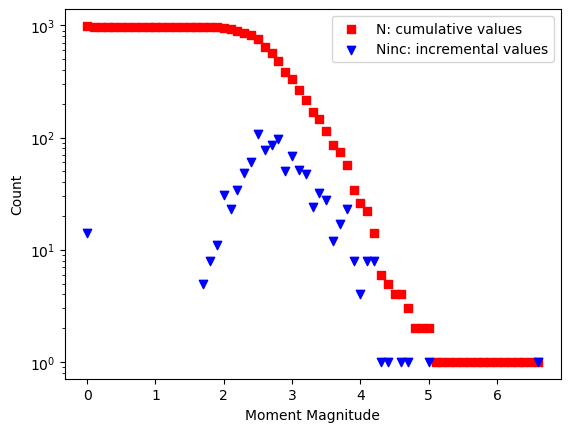

In [12]:
# Problem 1-3
# Start your work here
# 1-3 a
plt.figure()
plt.scatter(Medges[:-1], N, label='N: cumulative values', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental values', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Moment Magnitude')
plt.ylabel('Count')
plt.legend()
plt.show()

In [13]:
Mc = 2.8
Mmax = 4.8

Mc_index = np.where(Medges==Mc)
Mmax_index = np.where(Medges==Mmax)
print("Mc = {} and maximum Moment Magnitude used for GR line fit is {}".format(Mc_index,Mmax_index))

index = np.where((Medges >= Mc) & (Medges <= Mmax))
print(index)

Mc = (array([28]),) and maximum Moment Magnitude used for GR line fit is (array([48]),)
(array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48]),)


b value = 1.242 ± 0.039 for: 2.8 <= Mw <= 4.8.
The intercept is at Mw 6.315.


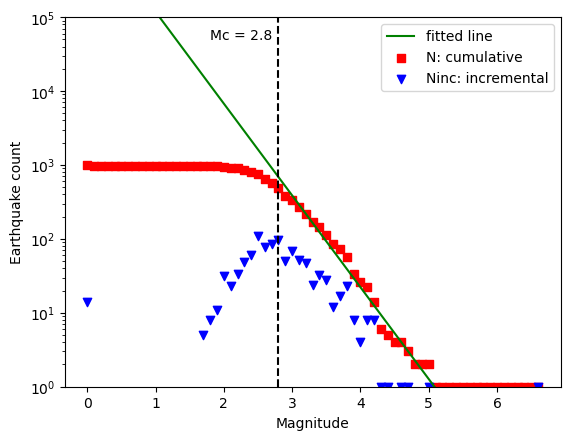

In [18]:
# 1-3 b Slope
# check inbetween mag 1 and 5
from scipy.stats import linregress
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

res = linregress(Medges[index], np.log10(N[index]))

print("b value = {:.3f} \u00B1 {:.3f} for: {} <= Mw <= {}.\nThe intercept is at Mw {:.3f}.".format(-res.slope, res.stderr, Mc, Mmax, res.intercept))

Nlin = (res.intercept + res.slope*Medges[:-1])

# Don't forget to take the y values to the power of 10
plt.plot(Medges[:-1], 10**Nlin, 'g', label='fitted line')

plt.scatter(Medges[:-1], N, label='N: cumulative', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Magnitude')
plt.ylabel('Earthquake count')
plt.ylim(1,1e5)
plt.legend()
plt.vlines(Mc, 1, 1e5, colors='k', linestyles='dashed')
plt.text(x=Mc-1, y=1e5-5e4, s='Mc = {}'.format(Mc))
plt.savefig("GR_Samos.png", dpi=300)
plt.show()

In [115]:
# 1-3 c Largest expected earthquake
n = 1
Mmax = (n - res.intercept)/ res.slope
print(Mmax)

4.206507122240131


In [116]:
t1 = pd.to_datetime('17/12/1993')
t2 = pd.to_datetime('02/10/2019')
(t2 - t1)
9186/365 #years

/tmp/ipykernel_65918/3690621382.py:1: UserWarning: Parsing '17/12/1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  t1 = pd.to_datetime('17/12/1993')


25.167123287671235